# SDSS: Data I/O and Binned Plotting

Today we will be loading up some SDSS data (mass, metallicity, and star formation rate) for a bunch of galaxies. We will then plot the mass-metallicity relation, and explore it in a bit more depth. 

Let's go ahead and get started with our import statements:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits

Before we start working with the data that we'll be using today, let's explore how the data is stored, since you'll see this type of file a lot in a variety of astronomy contexts. These files are known as *Flexible Image Transport System*, or FITS, files and are often used in astronomy because they allow you to efficiently store high-dimensional data, such as astronomical images. Today we'll be using a python package called astropy to read and interact with our FITS files, since they can't be directly modified through numpy like the text files we've been using. 

FITS files are unique in that they consist of these things called *Header Data Units*, or HDUs. This means that the files don't just store *data*, but also store a *header* along with that data to describe some information about the data (for example the specifications of the observations used to collect that data). In general a FITS file could contain multiple HDUs, which together would be referred to as an HDUList, often abbreviated as `hdul`. Just like any other list in python, you can access each of the HDUs within that list by indexing it (i.e., counting from 0, 1, 2, etc.).

First let's try opening one of the FITS files we'll be using today and see what it contains.

In [ ]:
file = fits.open('gal_totsfr_dr7_v5_2.fits') # load the file using the astropy function
print(file.info()) # inspect the file details

Filename: gal_totsfr_dr7_v5_2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     35   927552R x 9C   [E, D, E, E, E, E, E, E, E]   
None


Ok, so it looks like the file we opened has 2 HDUs in it, one called the `PRIMARY`, which has no data (see the blank below the Dimensions header) and a table (of the type `BinTableHDU`), which has 927552 rows (each of which corresponds to an individual galaxy!) and 9 columns. The `Cards` column tells us how much information is stored in the header (i.e., how many keywords the header has) and the `Format` column indicates the type of data stored in each of the columns of the HDU table. For example, we can access the header of the *primary* HDU in this file via the following:

In [4]:
file[0].header

SIMPLE  =                    T /Dummy Created by MWRFITS v1.6a                  
BITPIX  =                    8 /Dummy primary header created by MWRFITS         
NAXIS   =                    0 /No data is associated with this header          
EXTEND  =                    T /Extensions may (will!) be present               

This shows the four `Cards` in the HDU header and includes a comment about what each keyword means. In general, the header will be more complex, but for this HDU, the header doesn't really hold any information. In the cell below, access the header for the HDU table to see what `Cards` it has.

In [ ]:
# code to access header goes below!


Great. Now that we're a bit more familiar with the FITS file type, we can set up a function to directly load the data from the fits files we downloaded. let's define a function that will do this for any fits data table file, and then feed it the three file-names we have. 

In [ ]:
def load_fits(fname):
    hdu = 		#load the fits file into python
    data =       #accesses the data table (hint: you can use '.data' to access the data associated with an HDU)
    return data

sfr_full = load_fits('gal_totsfr_dr7_v5_2.fits')
mass_full = load_fits('totlgm_dr7_v5_2b.fit')
z_full = load_fits('gal_fiboh_dr7_v5_2.fits')

We now have three sets of data. Each of our datasets above has multiple columns being stored in what is known as a "record array" (or rec.array). This is a form of array that allows indexing by attribue, much like a dictionary. We can print out what the column names are by using dot notation on our data sets. 

In [8]:
sfr_full.columns

ColDefs(
    name = 'AVG'; format = 'E'
    name = 'ENTROPY'; format = 'D'
    name = 'FLAG'; format = 'E'
    name = 'MEDIAN'; format = 'E'
    name = 'MODE'; format = 'E'
    name = 'P16'; format = 'E'
    name = 'P2P5'; format = 'E'
    name = 'P84'; format = 'E'
    name = 'P97P5'; format = 'E'
)

As we can see, we have columns like "Avg", "Entropy", "Median", "Flag", etc. For the purposes of today's exercises, we are interested in the "Avg column." Like most datasets of real data, not all of the galaxies or entries in these files are usable- generally the pipeline that creates the datasets will "flag" bad data in an easily programmatically removable way. Sometimes it is using a "flag" column, and other times is is by selecting an arbitrary and non-physical number to enter as the value (this is how the SDSS data is handled). The values of the flags can usually be found in a readme file. 

So, we need to restrict our data to just those that don't have any warning flags. In the cell below, find the indices (locations) for which the following conditions are satisfied, and save them to a variable called "restrictions":

1. In the SFR array, the value is > -99
2. In the Mass array, the value is not equal to -1
3. In the metallicity array, the value is > -99.9 

Try to do this without using a for loop to iterate over the arrays and check the conditions!

In [10]:
restrictions = 

Great, so now we know which indices correspond to the data that's actually useable. Out of curiosity, calculate the number of elements this process actually removed below:

724339


Next, we need to actually grab that data (remember, our `restrictions` variable only gives us the indices). Fill in the rest below

In [12]:
sfr = 
mass = 
z = 

Note: These arrays (because we are using our full arrays from above), are record arrays containing multiple values for each galaxy. We can print out sfr below to see what that means (you can re-run the cell below to ensure you got the same thing I did): 

In [27]:
sfr

array([( 0.0813901 , -4.4283232 , 0.,  0.04046527,  0.05000019, -0.19248106, -0.4438595 ,  0.30087733,  0.62325597),
       (-0.14585991, -4.36189085, 0., -0.1865475 , -0.25      , -0.40367356, -0.64416677,  0.05915504,  0.39761928),
       (-0.3946299 , -4.45485405, 0., -0.4310218 , -0.5       , -0.6633065 , -0.9434209 , -0.16827413,  0.16142888),
       ...,
       ( 0.22899014, -2.66265069, 2.,  0.19214118,  0.20000029,  0.11597011,  0.02719309,  0.2938598 ,  0.34685245),
       (-2.01222   , -4.88495688, 2., -2.0584905 , -2.        , -2.4491737 , -2.710241  , -1.6       , -1.2664285 ),
       (-0.8014198 , -2.27985398, 2., -0.83019316, -0.7999997 , -0.88976175, -1.0017241 , -0.7295781 , -0.68342847)],
      dtype=(numpy.record, [('AVG', '>f4'), ('ENTROPY', '>f8'), ('FLAG', '>f4'), ('MEDIAN', '>f4'), ('MODE', '>f4'), ('P16', '>f4'), ('P2P5', '>f4'), ('P84', '>f4'), ('P97P5', '>f4')]))

Essentially, sfr is a an array of the same type as the original, only with the bad entries removed. Using the same indexing, create variables sfrs, masses, and metallicities by indexing your sfr, mass, and z arrays for the "AVG" column.

In [15]:
avg_sfr = 
avg_mass = 
avg_metallicity = 

In [16]:
print(avg_sfr)

[ 0.0813901  -0.14585991 -0.3946299  ...  0.22899014 -2.01222
 -0.8014198 ]


Now we are getting somewhere. We have a single array for all the good star formation rates, an array of masses, and an array of metallicities. What is the Mass-Metallicity relation for galaxies? Let's find out. Define a function to plot mass vs metallicity as a 2D histogram with 300 bins (plt has a command for this). You'll want to utilize the "LogNorm" function that we imported at the top to get a good color gradient- google "plt 2d histogram LogNorm" if you don't know how to do this already.

In [17]:
def plot_mass_vs_metal(masses,metallicities):
    #Plot mass against metalicity.

    plt.colorbar()
    plt.title('Mass/Metallicity relation for SDSS Galaxies')
    plt.xlabel(r'$\log$ Mass [$M_\odot$]')
    plt.ylabel(r'$\log$ Gas Phase Metallicities')
    plt.show()

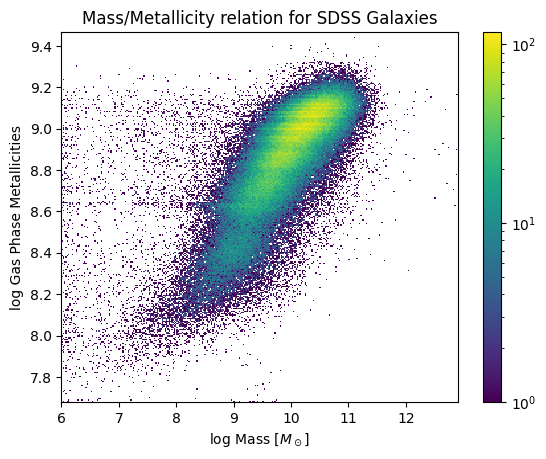

In [18]:
plot_mass_vs_metal(masses,metallicities)

When you run your function, you should get an image identical to the one displayed above. As we can see, the gas phase metallicity of a galaxy (that is, it's composition in terms of elements) has a positive correlation with the mass. However, maybe this is not quite as direct a relation as we might think. We also pulled in Star Formation Rates. Perhaps those are also correlated? Fill in the functions below to make the histograms for SFR v metallicity and SFR v mass. 

In [20]:
def plot_sfr_metal(sfrs,metallicities):

    plt.title('SFR/Metallicity relation for SDSS Galaxies')
    plt.colorbar()
    plt.xlabel(r'log SFR')
    plt.ylabel(r'log Gas Phase Metallicities')
    plt.show()
def plot_mass_sfr(masses=masses,sfrs=sfrs):

    plt.title('Mass/SFR relation for SDSS Galaxies')
    plt.colorbar()
    plt.xlabel(r'log Mass')
    plt.ylabel(r'log SFR')
    plt.show()

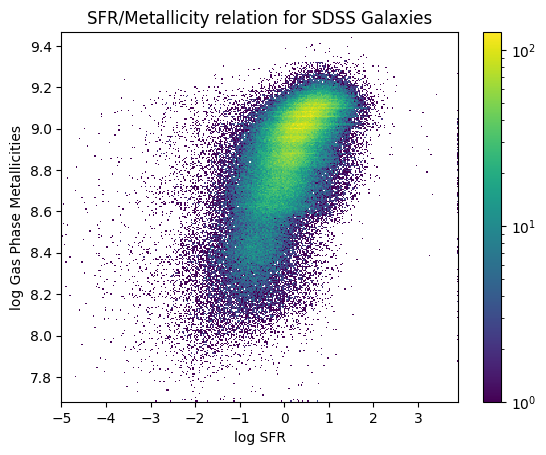

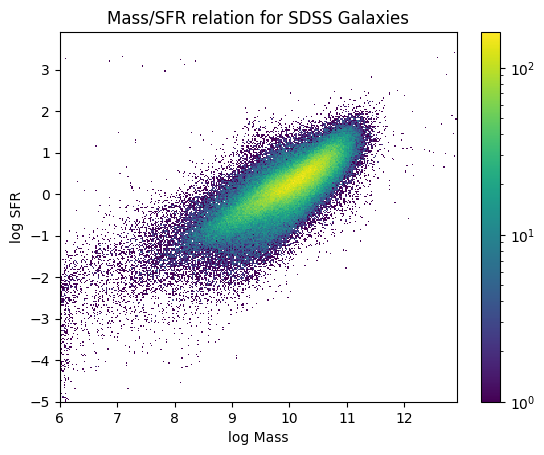

In [21]:
plot_sfr_metal(sfrs,metallicities)
plot_mass_sfr()

Oh dear. It seems like SFR correlates positively with mass, and metallicity correlates positively with SFR. We need to tease out which of these things are actually correlated, and which only look correlated because they depend on something else which is correlated. 

One way we can do this is to take slices of one variable. For example, if metallicity truly does depend on mass, then for all galaxies of a single mass, the correlation should disappear. We can do such a check for all three of our variables- taking slices of single SFR, metallicity, and mass, and see for which the positive correlation dissapears. 

In the space below, write 3 functions, which will bin your data by mass, metallicity, and sfr slices. In theory we would select multiple single slices (choosing a specific value), but in practice our bins will have to have a certain width. To make things easier, I have looked at the data and created a bins array for each function- see if you can figure out how it works (look at the bounds on the graphs above and the behavior of linspace). 

In [22]:
def mass_bins(masses):
    bins = np.linspace(7,12,10)
    binned_masses = []
    binned_sfrs = []
    binned_z = []
    for i in range(len(bins)-1):
        mass_indices =                       #check "where" masses are > left edge of bin and < right edge of bin
        mass_indices = np.array(mass_indices)
        masses_needed =                      #index masses for the indices found above
        sfr_needed =                         #ditto for sfrs 
        z_needed =                           #ditto for metallicities
        binned_masses.append(masses_needed)
        binned_sfrs.append(sfr_needed)
        binned_z.append(z_needed)
    return binned_masses, binned_sfrs, binned_z

def sfr_bins(sfrs):
    bins = np.linspace(-2,2,10)
    binned_masses = []
    binned_sfrs = []
    binned_z = []
    for i in range(len(bins)-1):
        sfr_indices = 
        to_choose = np.array(sfr_indices)
        masses_needed =                  #same process as above
        sfr_needed = 
        z_needed = 
        binned_masses.append(masses_needed)
        binned_sfrs.append(sfr_needed)
        binned_z.append(z_needed)
    return binned_masses, binned_sfrs, binned_z

def z_bins(metallicities):
    bins = np.linspace(8,9.5,10)
    binned_masses = []
    binned_sfrs = []
    binned_z = []
    for i in range(len(bins)-1):
        z_indices = 
        to_choose = np.array(z_indices)
        masses_needed =                 #and once more (but for z)
        sfr_needed = 
        z_needed = 
        binned_masses.append(masses_needed)
        binned_sfrs.append(sfr_needed)
        binned_z.append(z_needed)
    return binned_masses, binned_sfrs, binned_z

Lastly, let's write some simple functions to plot up all the sliced data: (This time use 100 bins since there is less data per plot)

In [23]:
def plot_mbins(masses=masses):
    m,s,z = mass_bins(masses)
    for i in range(len(m)):
                           #2d histogram, think about what to index here
        plt.xlabel('Log SFR')
        plt.ylabel('Log Metallicity')
        plt.colorbar()
        plt.figure()
    plt.show()
    return
    
def plot_sfrbins(sfrs=sfrs):
    m,s,z = sfr_bins(sfrs)
    for i in range(len(m)):
                           #2d histogram, think about what to index here
        plt.xlabel('Log Mass')
        plt.ylabel('Log Metallicity')
        plt.colorbar()
        plt.figure()
    plt.show()
    return
def plot_zbins(metallicities=metallicities):
    m,s,z = z_bins(metallicities)
    for i in range(len(m)):
                            #2d histogram, think about what to index here
        plt.xlabel('Log Mass')
        plt.ylabel('Log SFR')
        plt.colorbar()
        plt.figure()
    plt.show()
    return

As a final step, lets run our functions below, and see what we get: 

In [ ]:
plot_mbins()

In [ ]:
plot_sfrbins()

In [ ]:
plot_zbins()

As we can see, the relationship between SFR and metallicity disappears at a single mass slice (the first ten plots). Thus, SFR and metallicity are not truly correlated, but only appear so when all masses are included because each depends on mass (which can be seen in the second and third set of plots, where for single slice in metallicity, the SFR/mass relation still exists, and for single slices in SFR, the mass/metallicity relation still exists. 

Now let's use the stuff we covered last week to fit a curve to this data -- what degree of polynomial do you think we need? What does your equation look like?